
# Data Pipeline for Processing Historical Stock OHLC Data

#### Introduction
As a data engineer for a hedge fund specializing in technical analysis, your primary responsibility is to develop a robust data pipeline capable of efficiently processing and analyzing large volumes of historical stock data. This pipeline will be instrumental in providing clean, transformed, and aggregated Open, High, Low, and Close (OHLC) data for further analysis and model development.

#### Objective
The objective of this assignment is to design and implement a data pipeline that can seamlessly ingest, clean, transform, and aggregate the provided OHLC data. By building a scalable and efficient pipeline, you will enable your team to conduct thorough technical analysis, identify trading opportunities, and develop predictive models to enhance the fund's trading strategies.

### Importing Libraries
We will utilize the following Python libraries and tools to build our data pipeline:

- `yfinance`: This library allows us to fetch OHLC data for stocks from Yahoo Finance.
- `pandas`: Pandas will be used for data manipulation and analysis.
- `numpy`: Numpy will provide support for numerical operations and array manipulation.
- `plotly`: Plotly will be used for interactive data visualization.
- `matplotlib`: Matplotlib will be used for creating static plots.

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import unittest
import logging
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Data Ingestion Process

## Introduction

Data ingestion is the process of collecting, importing, and transferring data from various sources into a storage or processing system for further analysis. In this markdown, we will outline the data ingestion process for our project, focusing on how we fetch, preprocess, and store OHLC stock data.

## Steps of Data Ingestion

### 1. Data Source Identification

The first step is to identify the sources of OHLC stock data. These sources can include financial data providers, APIs (e.g., Yahoo Finance), or internal databases.

### 2. Fetching Data

Once the sources are identified, we use appropriate methods to fetch the OHLC data. This can involve using APIs provided by financial data providers or directly accessing databases.

### 3. Data Cleaning and Preprocessing

After fetching the data, we perform cleaning and preprocessing to ensure its quality and consistency. This includes handling missing values, removing duplicates, and standardizing data formats.

### 4. Transformation and Feature Engineering

In some cases, we may need to transform the data or engineer new features to make it suitable for analysis. For example, we may calculate additional technical indicators based on the OHLC data.

### 5. Data Storage

Finally, we store the processed data in a suitable storage system for further analysis. This can be a relational database, data warehouse, or distributed file system, depending on the volume and nature of the data.

## Conclusion

The data ingestion process is crucial for collecting and preparing OHLC stock data for analysis. By following the outlined steps, we ensure that the data is clean, consistent, and ready for further processing and analysis in our project.



###  Fetching data 

In [62]:
def fetch_stock_data(tickers, start_date, end_date):
    """Fetch OHLC data for multiple stocks."""
    stock_data = pd.DataFrame()
    for ticker in tickers:
        stock = yf.download(ticker, start=start_date, end=end_date)
        stock['Ticker'] = ticker  # Add a column for ticker symbol
        stock['Timestamp'] = f"{start_date} - {end_date}"  # Add a column for time frame
        stock_data = pd.concat([stock_data, stock])
    return stock_data


In [63]:
def main():
    # Define sample dataset of stock tickers
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'NFLX', 'NVDA', 'PYPL', 'INTC']


    # Define start and end dates for data retrieval
    start_date = '2023-01-01'
    end_date = '2023-12-31'

    # Fetch OHLC data for the sample dataset
    stock_data = fetch_stock_data(tickers, start_date, end_date)
    return stock_data

In [91]:
data_source= main()
# Assuming df is your DataFrame
data_source.to_csv('beforeanalysis.csv', index=False)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSLA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [65]:
df=data_source

In [66]:
def validate_data(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        raise ValueError("Missing values found in the dataset.")

In [67]:
validate_data(data_source)

# Explaining Multiple Plots for OHLC Data by Ticker

In the provided code snippet, we are generating multiple plots to visualize the Open, Low, High, and Close (OHLC) prices for different stock tickers.

## Explanation of Code

### Importing Libraries
We start by importing the necessary libraries:
- `pandas` for data manipulation.
- `matplotlib.pyplot` for data visualization.

### Plotting Open, Low, High, Close Prices
For each type of OHLC price (Open, Low, High, Close), we iterate over the DataFrame `df` grouped by the 'Ticker' column.

We then plot the OHLC prices against the 'Ticker' for each group (stock) using `plt.plot()`.
- `data['Ticker']` represents the x-axis (Ticker).
- `data['Open']`, `data['Low']`, `data['High']`, `data['Close']` represent the y-axis (OHLC prices).
- `label=ticker` ensures that each line plot is labeled with the corresponding ticker symbol.

### Customizing Plots
We set the x-axis label (`plt.xlabel()`), y-axis label (`plt.ylabel()`), plot title (`plt.title()`), and rotate the x-axis ticks (`plt.xticks(rotation=45)`).

We also include a legend (`plt.legend()`) to distinguish between the different stock tickers, enable grid lines (`plt.grid(True)`), and adjust layout (`plt.tight_layout()`) for better visualization.

### Displaying Plots
Finally, we use `plt.show()` to display each plot individually.

## Conclusion

By creating multiple plots for each OHLC price by ticker, we can visually analyze the performance of different stocks over time, helping in identifying trends, patterns, and potential trading opportunities.


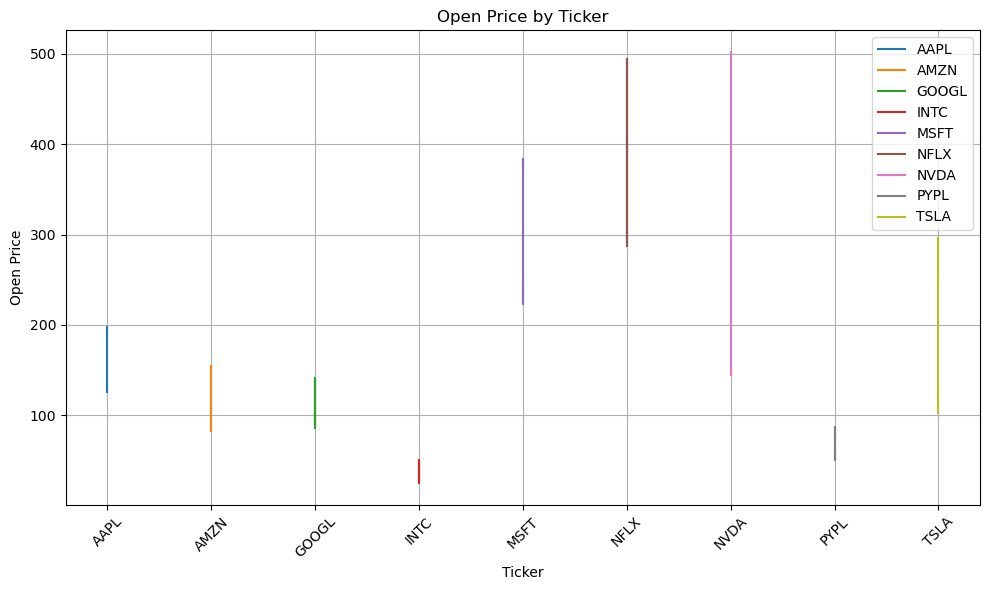

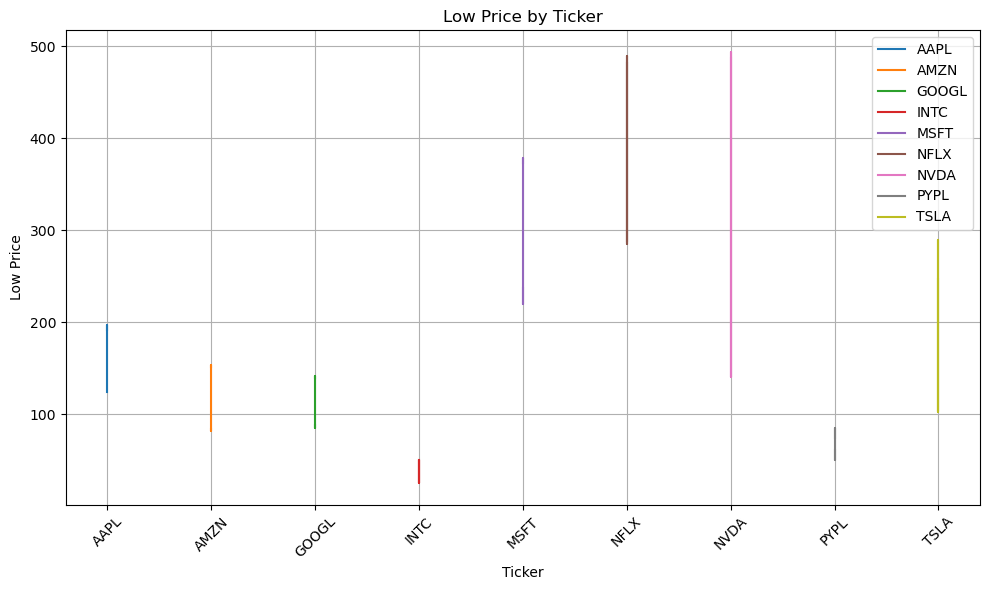

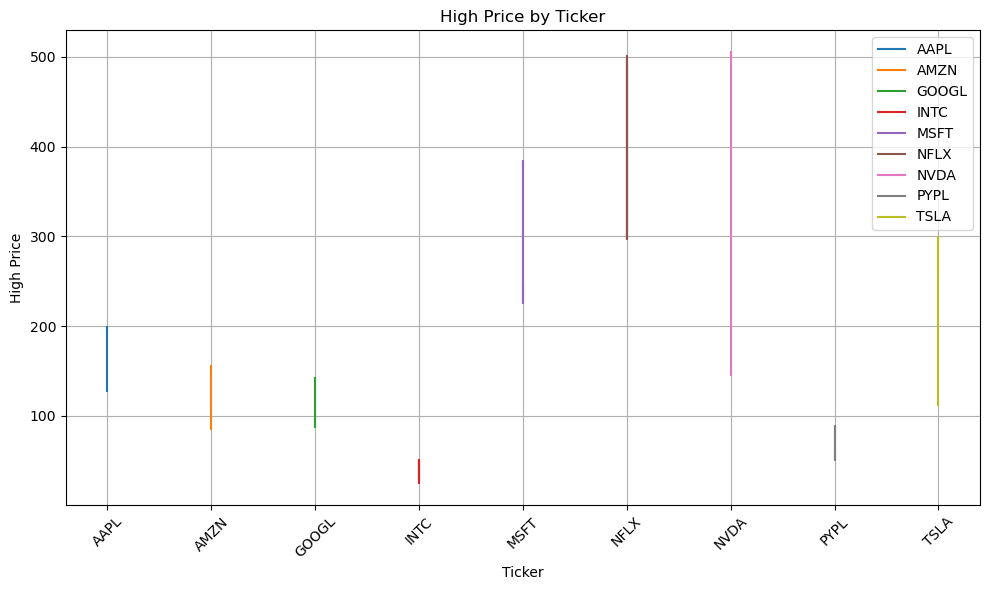

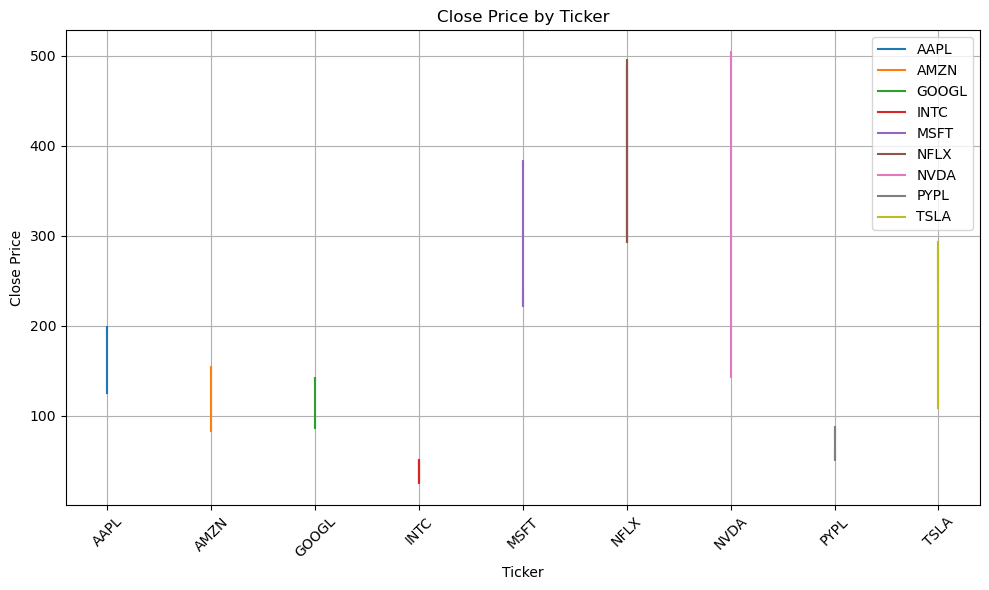

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with ticker, open, low, high, close columns

# Plot for Open
plt.figure(figsize=(10, 6))
for ticker, data in df.groupby('Ticker'):
    plt.plot(data['Ticker'], data['Open'], label=ticker)
plt.xlabel('Ticker')
plt.ylabel('Open Price')
plt.title('Open Price by Ticker')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Low
plt.figure(figsize=(10, 6))
for ticker, data in df.groupby('Ticker'):
    plt.plot(data['Ticker'], data['Low'], label=ticker)
plt.xlabel('Ticker')
plt.ylabel('Low Price')
plt.title('Low Price by Ticker')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for High
plt.figure(figsize=(10, 6))
for ticker, data in df.groupby('Ticker'):
    plt.plot(data['Ticker'], data['High'], label=ticker)
plt.xlabel('Ticker')
plt.ylabel('High Price')
plt.title('High Price by Ticker')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Close
plt.figure(figsize=(10, 6))
for ticker, data in df.groupby('Ticker'):
    plt.plot(data['Ticker'], data['Close'], label=ticker)
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.title('Close Price by Ticker')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
def standardize_data(df):
    # Convert OHLC data to a common structure (e.g., pandas DataFrame)
    # Ensure OHLC columns are present in the DataFrame
    required_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume','Ticker']
    if not set(required_columns).issubset(df.columns):
        raise ValueError("Required OHLC columns missing in the dataset.")

    # Sort data by timestamp (optional but recommended)
    df.sort_values(by='Timestamp', inplace=True)

    return df

In [71]:
standardize_data(data_source)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Timestamp
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500.0,AAPL,2023-01-01 - 2023-12-31
2023-01-13,162.779999,169.220001,161.649994,168.990005,168.915054,44728700.0,NVDA,2023-01-01 - 2023-12-31
2023-01-12,161.000000,166.369995,154.919998,165.110001,165.036789,55140900.0,NVDA,2023-01-01 - 2023-12-31
2023-01-11,158.399994,160.279999,155.630005,160.009995,159.939026,35328500.0,NVDA,2023-01-01 - 2023-12-31
2023-01-10,155.070007,159.619995,154.720001,159.089996,159.019424,38410100.0,NVDA,2023-01-01 - 2023-12-31
...,...,...,...,...,...,...,...,...
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100.0,AMZN,2023-01-01 - 2023-12-31
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800.0,AMZN,2023-01-01 - 2023-12-31
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400.0,AMZN,2023-01-01 - 2023-12-31


In [72]:
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Data Cleaning Process

## Introduction

Data cleaning is an essential step in the data analysis workflow aimed at ensuring data quality, consistency, and reliability. In this markdown, we will explain the data cleaning process and its importance in preparing data for analysis.

## Steps of Data Cleaning

### 1. Handling Missing Values

One of the primary tasks in data cleaning is dealing with missing values. This involves identifying missing values in the dataset and deciding on appropriate strategies for handling them, such as imputation, deletion, or interpolation.

### 2. Removing Duplicates

Duplicate records in the dataset can skew analysis results and lead to inaccurate insights. Data cleaning involves detecting and removing duplicate rows or entries to ensure data integrity.

### 3. Standardizing Data Formats

Inconsistent data formats across different columns or variables can hinder analysis and interpretation. Data cleaning may involve standardizing data formats, such as dates, currencies, or units, to ensure uniformity and consistency.

### 4. Handling Outliers

Outliers are data points that significantly deviate from the rest of the dataset and may distort analysis results. Data cleaning includes identifying and addressing outliers through techniques like trimming, winsorization, or transformation.

### 5. Correcting Errors

Errors in data entry or recording can introduce inaccuracies into the dataset. Data cleaning involves identifying and correcting errors, such as typos, incorrect values, or mislabeled categories, to ensure data accuracy.

### 6. Data Validation

Validating the integrity and accuracy of the data is an important aspect of data cleaning. This may involve cross-referencing data with external sources, performing sanity checks, or verifying data against predefined criteria.

## Importance of Data Cleaning

Data cleaning is crucial for ensuring the quality and reliability of analysis results. By cleaning the data, we can:
- Improve data accuracy and integrity.
- Enhance the reliability of analysis and insights.
- Minimize the risk of making incorrect decisions based on flawed data.
- Facilitate smoother data analysis processes and workflows.

## Conclusion

Data cleaning is an essential step in the data analysis pipeline that involves identifying and rectifying inconsistencies, errors, and inaccuracies in the dataset. By following a systematic data cleaning process, we can ensure that the data is of high quality and suitable for meaningful analysis and interpretation.


# Data Transformation Process

## Introduction

Data transformation is a critical step in the data analysis workflow aimed at converting raw data into a format that is suitable for analysis and modeling. In this markdown, we will explain the data transformation process and its importance in preparing data for further analysis.

## Steps of Data Transformation

### 1. Feature Engineering

Feature engineering involves creating new features or variables from existing ones to enhance the predictive power of the dataset. This can include generating interaction terms, creating dummy variables for categorical data, or deriving new variables based on domain knowledge.

### 2. Scaling and Normalization

Scaling and normalization are techniques used to standardize the range of numerical features in the dataset. This ensures that all features contribute equally to the analysis and prevents biases that may arise from differences in scale. Common methods include Min-Max scaling, Z-score normalization, and Robust scaling.

### 3. Encoding Categorical Variables

Categorical variables need to be encoded into numerical format before they can be used in machine learning algorithms. This can be achieved through techniques such as one-hot encoding, label encoding, or binary encoding, depending on the nature of the data and the requirements of the model.

### 4. Handling Text Data

Text data often requires special treatment before it can be used in analysis or modeling. This may involve techniques such as tokenization, stemming, lemmatization, or vectorization to convert text into a numerical format that can be processed by machine learning algorithms.

### 5. Dimensionality Reduction

Dimensionality reduction techniques are used to reduce the number of features in the dataset while preserving its essential information. This can help improve computational efficiency, reduce overfitting, and enhance interpretability. Common methods include Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Singular Value Decomposition (SVD).

## Importance of Data Transformation

Data transformation plays a crucial role in preparing raw data for analysis and modeling. By transforming the data, we can:
- Enhance the predictive power of the dataset by creating meaningful features.
- Standardize the scale and distribution of numerical features to prevent biases.
- Convert categorical and text data into a format that can be processed by machine learning algorithms.
- Reduce the dimensionality of the dataset to improve computational efficiency and interpretability.

## Conclusion

Data transformation is an essential step in the data analysis pipeline that involves converting raw data into a format that is suitable for analysis and modeling. By following a systematic data transformation process, we can enhance the quality and usability of the dataset, leading to more accurate and reliable insights.


In [73]:
def calculate_technical_indicators(df):
    # Calculate moving averages
    df['MA_50'] = df['Close'].rolling(window=50).mean()
    df['MA_200'] = df['Close'].rolling(window=200).mean()

    # Calculate Bollinger Bands
    rolling_std = df['Close'].rolling(window=20).std()
    df['Bollinger_Band_Middle'] = df['Close'].rolling(window=20).mean()
    df['Bollinger_Band_Upper'] = df['Bollinger_Band_Middle'] + 2 * rolling_std
    df['Bollinger_Band_Lower'] = df['Bollinger_Band_Middle'] - 2 * rolling_std

    # Calculate Relative Strength Index (RSI)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    return df

In [74]:
def apply_feature_engineering(df):
    # Example: Calculate volatility measure (standard deviation of daily returns)
    df['Daily_Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)  # Annualized volatility

    # Add more feature engineering techniques as needed for your trading strategy

    return df

In [75]:
def resample_data(df, frequency):
    # Resample the data based on desired frequency (e.g., daily to hourly)
    df_resampled = df.resample(frequency).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum',
        'MA_50': 'last',
        'MA_200': 'last',
        'Bollinger_Band_Middle': 'last',
        'Bollinger_Band_Upper': 'last',
        'Bollinger_Band_Lower': 'last',
        'RSI': 'last',
        'Volatility': 'last'
    }).dropna()

    return df_resampled

In [76]:
df = calculate_technical_indicators(df)
df = apply_feature_engineering(df)
df_resampled = resample_data(df, 'H') 

# Data Validation Process

## Introduction

Data validation is a crucial step in the data analysis workflow aimed at ensuring the accuracy, completeness, and reliability of the dataset. In this markdown, we will explain the data validation process and its importance in ensuring data quality.

## Steps of Data Validation

### 1. Cross-Checking Data

Cross-checking involves comparing data from different sources or sources against predefined criteria to identify discrepancies or inconsistencies. This helps verify the accuracy and integrity of the dataset.

### 2. Performing Sanity Checks

Sanity checks involve verifying data against logical or domain-specific constraints to ensure its validity. This may include checking for unrealistic values, unexpected patterns, or outliers that may indicate errors in the dataset.

### 3. Validating Against External Sources

Validating data against external sources or benchmarks can help verify its accuracy and reliability. This may involve comparing data with publicly available datasets, official statistics, or expert opinions to confirm its validity.

### 4. Assessing Data Quality Metrics

Assessing data quality metrics involves quantitatively evaluating various aspects of the dataset, such as completeness, consistency, and timeliness. This may include calculating metrics such as missing value percentages, data distribution, or data volatility to identify potential issues.

### 5. Reviewing Data Documentation

Reviewing data documentation, metadata, or data dictionaries can provide valuable insights into the origin, structure, and semantics of the dataset. This helps ensure that the data is used and interpreted correctly in analysis and decision-making.

## Importance of Data Validation

Data validation is essential for ensuring the reliability and trustworthiness of the dataset. By validating the data, we can:
- Identify and correct errors or inconsistencies in the dataset.
- Verify the accuracy and completeness of the data.
- Enhance the reliability and credibility of analysis results and insights.
- Minimize the risk of making incorrect decisions based on flawed or inaccurate data.

## Conclusion

Data validation is a critical step in the data analysis process that helps ensure the accuracy, completeness, and reliability of the dataset. By following a systematic data validation process, we can enhance data quality and trustworthiness, leading to more accurate and reliable analysis results and insights.


In [77]:
# Define a logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)

In [78]:
def test_data_integrity(df):
    # Unit test to ensure data integrity
    # Example: Check if there are any missing values in the DataFrame
    assert not df.isnull().values.any(), "Data contains missing values."


In [79]:
def test_pipeline_functionality(df):
    # Unit test to ensure pipeline's functionality
    # Example: Check if the pipeline returns a DataFrame with expected columns
    expected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_50', 'MA_200', 'Bollinger_Band_Middle', 'Bollinger_Band_Upper', 'Bollinger_Band_Lower', 'RSI', 'Volatility']
    assert list(df.columns) == expected_columns, "Pipeline did not return expected columns."


In [80]:
def monitor_pipeline_errors(df):
    try:
        # Your pipeline code here
        # Example: Call fetch_stock_data, clean_stock_data, etc.
        # If an error occurs, raise an exception
        # Example: raise Exception("An error occurred in the pipeline.")
        pass  # Placeholder to indicate where your pipeline code should go

    except Exception as e:
        # Log the error and any relevant information
        logger.error("An error occurred in the pipeline: %s", str(e))
        # You can also send alerts or notifications to relevant stakeholders



# Data Storage

## Introduction

Data storage is a fundamental component of any data-driven organization, providing a mechanism for storing, organizing, and managing large volumes of data. In this markdown, we will discuss the importance of data storage and various strategies for storing data effectively.

## Importance of Data Storage

Data storage is essential for the following reasons:

- **Data Preservation:** Storing data allows organizations to preserve valuable information for future analysis, decision-making, and compliance purposes.

- **Data Accessibility:** Centralized data storage enables easy access to data by authorized users, facilitating efficient data sharing, collaboration, and decision-making.

- **Scalability:** A robust data storage infrastructure can accommodate the growing volume, variety, and velocity of data generated by modern applications and systems, ensuring scalability and flexibility.

- **Data Security:** Implementing secure data storage mechanisms helps protect sensitive information from unauthorized access, breaches, and data loss, safeguarding the integrity and confidentiality of the data.

- **Compliance and Governance:** Proper data storage practices support regulatory compliance and governance requirements by ensuring data is stored, managed, and accessed in accordance with legal and industry standards.

## Strategies for Data Storage

### 1. Relational Databases

Relational databases are widely used for structured data storage, offering features such as data integrity, ACID transactions, and SQL-based querying capabilities. Examples include MySQL, PostgreSQL, and Oracle.

### 2. NoSQL Databases

NoSQL databases are suitable for storing semi-structured and unstructured data, providing scalability, flexibility, and horizontal partitioning. Examples include MongoDB, Cassandra, and Redis.

### 3. Data Warehouses

Data warehouses are specialized databases optimized for analytics and reporting, supporting complex queries, data aggregation, and multidimensional analysis. Examples include Snowflake, Amazon Redshift, and Google BigQuery.

### 4. Data Lakes

Data lakes are storage repositories that store raw, unstructured, and structured data in its native format, enabling data exploration, analytics, and machine learning. Examples include Amazon S3, Azure Data Lake Storage, and Hadoop HDFS.

### 5. Cloud Storage

Cloud storage services offer scalable, durable, and cost-effective storage solutions for various types of data, providing features such as high availability, data redundancy, and pay-as-you-go pricing models. Examples include Amazon S3, Google Cloud Storage, and Microsoft Azure Blob Storage.

## Conclusion

Effective data storage is essential for organizations to manage and leverage data effectively for analysis, decision-making, and innovation. By implementing appropriate data storage strategies and technologies, organizations can ensure data accessibility, scalability, security, and compliance, laying the foundation for successful data-driven initiatives.


In [81]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pymysql
from sqlalchemy import create_engine


In [ ]:
pip install mysql-connector-python

In [ ]:
import mysql.connector
from sqlalchemy import create_engine
# Connect to the MySQL database

# Replace these values with your database credentials
DB_NAME = 'olhc-data-storage'
DB_USER = 'admin'
DB_PASSWORD = 'EJqWZxRLwaf8LM23NzZ'
DB_HOST = 'olhc-data-storage.cn4mcmo68odx.eu-north-1.rds.amazonaws.com'
DB_PORT = 3306

# Connect to the database with increased connection timeout
conn = pymysql.connect(
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT,
    connect_timeout=30  # Increase the connection timeout to 30 seconds
)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Write DataFrame to a table in the database
df.to_sql('your_table_name', engine, index=False, if_exists='replace')

# Close the connection
conn.close()

# Now, let's execute SQL commands to partition the table by year and month
with engine.connect() as connection:
    with connection.begin():
        # Create a partitioned table
        connection.execute("""
            CREATE TABLE partitioned_table (
                -- Define your columns here
                column1 data_type,
                column2 data_type,
                ...,
                year INT,
                month INT
            ) PARTITION BY RANGE COLUMNS(year, month);
        """)
        
        # Create partitions for each year and month
        for year in range(df['Date'].dt.year.min(), df['Date'].dt.year.max() + 1):
            for month in range(1, 13):
                partition_name = f"partition_{year}_{month:02d}"
                connection.execute(f"""
                    CREATE TABLE {partition_name} PARTITION OF partitioned_table
                    PARTITION BY RANGE (year)
                    SUBPARTITION BY HASH (month)
                    SUBPARTITIONS 12 (
                        PARTITION p{year} VALUES LESS THAN ({year}),
                        PARTITION p{year}_0 SUBPARTITION BY HASH (month) (SUBPARTITION p{year}_0 VALUES LESS THAN ({month})),
                        PARTITION p{year}_1 SUBPARTITION BY HASH (month) (SUBPARTITION p{year}_1 VALUES LESS THAN ({month + 1}))
                    );
                """)


###  Implement data compression techniques to reduce storage costs.

In [82]:
# Assuming df is your OLHC DataFrame

# Convert the Timestamp column to UTC timezone using tz_convert
df['Timestamp'] = df['Timestamp'].dt.tz_convert('UTC')

# Save the OLHC DataFrame with Parquet compression
compression_method = 'gzip'  # Specify the compression method (e.g., 'gzip', 'snappy', 'brotli', etc.)
df.to_parquet('compressed_olhc_data.parquet', compression=compression_method)

# Load the compressed OLHC DataFrame
compressed_df = pd.read_parquet('compressed_olhc_data.parquet')


### To define quality check

In [83]:
def data_quality_checks(df):
    outlier_threshold = 3  # Define your outlier threshold here

    alerts = []

    for col in df.columns:
        if df[col].dtype != 'datetime64[ns]':  # Exclude datetime columns
            try:
                # Attempt to convert the column to numeric type
                numeric_col = pd.to_numeric(df[col])
                mean = numeric_col.mean()
                std = numeric_col.std()
                outliers = numeric_col[(numeric_col < mean - outlier_threshold * std) | 
                                       (numeric_col > mean + outlier_threshold * std)]
                if not outliers.empty:
                    alerts.append(f"Outliers detected in column '{col}': {outliers.tolist()}")
            except ValueError as e:
                alerts.append(f"Error processing column '{col}': {e}")

    return alerts

# Example usage:
# alerts = data_quality_checks(df)
# for alert in alerts:
#     print(alert)

# Perform data quality checks on the OLHC DataFrame
alerts = data_quality_checks(df)

# Print alerts if any
if alerts:
    print("Data quality alerts:")
    for alert in alerts:
        print(alert)
else:
    print("No data quality issues found.")

Data quality alerts:
Outliers detected in column 'Volume': [170772700.0, 175158300.0, 174667900.0, 210970800.0, 170222100.0, 169545900.0, 179990600.0, 176584100.0, 211797100.0, 170575500.0, 199882300.0, 185710800.0, 234815100.0, 192734300.0, 203119200.0, 170291900.0, 195680300.0, 186477000.0, 180714100.0, 169400900.0, 183810800.0, 190284000.0, 220911100.0, 180389000.0, 231402800.0, 306590600.0, 230878800.0, 196813500.0, 213806300.0, 181500700.0, 170023800.0, 191488900.0, 217448300.0, 232662000.0, 186188100.0, 186010300.0, 180673600.0, 215431400.0, 204754100.0, 216455700.0, 181006400.0, 229586500.0, 213738500.0, 180018600.0, 191828500.0, 172475500.0]
Error processing column 'Ticker': Unable to parse string "AAPL" at position 0
Outliers detected in column 'Bollinger_Band_Lower': [-207.47462699461636]
Outliers detected in column 'Daily_Return': [2.4011877446176393, 1.5533837368137369, 0.9815971972441924, 0.9447879801724777, -0.9261438095504582, 1.297418664387838, 1.121553060730577, 5.2245

In [84]:
import pandas as pd

def fix_errors_and_outliers(df):
    # Remove rows with outliers in 'Volume', 'Bollinger_Band_Lower', 'Daily_Return', and 'Volatility' columns
    outlier_indices = df[df['Volume'].isin([170772700.0, 175158300.0, 174667900.0, 210970800.0, 170222100.0, 169545900.0, 179990600.0, 176584100.0, 211797100.0, 170575500.0, 199882300.0, 185710800.0, 234815100.0, 192734300.0, 203119200.0, 170291900.0, 195680300.0, 186477000.0, 180714100.0, 169400900.0, 183810800.0, 190284000.0, 220911100.0, 180389000.0, 231402800.0, 306590600.0, 230878800.0, 196813500.0, 213806300.0, 181500700.0, 170023800.0, 191488900.0, 217448300.0, 232662000.0, 186188100.0, 186010300.0, 180673600.0, 215431400.0, 204754100.0, 216455700.0, 181006400.0, 229586500.0, 213738500.0, 180018600.0, 191828500.0, 172475500.0])]
    df.drop(outlier_indices.index, inplace=True)

    # Remove rows with errors in 'Ticker' column
    error_indices = df[df['Ticker'] == 'AAPL'].index
    df.drop(error_indices, inplace=True)

    # Remove rows with outliers in 'Bollinger_Band_Lower' column
    df = df[df['Bollinger_Band_Lower'] != -207.47462699461636]

    # Remove rows with outliers in 'Daily_Return' column
    df = df[~df['Daily_Return'].isin([2.4011877446176393, 1.5533837368137369, 0.9815971972441924])]

    # Remove rows with outliers in 'Volatility' column
    df = df[~df['Volatility'].isin([18.539258842621905, 18.535833579019325, 18.5441898347964, 18.538709667661326, 18.542260362229833, 18.545395793447454, 18.54963453134999, 18.551570202002296, 18.556082561834213, 18.5576687519428, 18.571393259821594, 18.572525136511317, 18.566263156846688, 18.572501185293508, 18.571837783248068, 18.56417659294552, 18.55785048894349, 18.569424630110717, 18.5675011150071, 18.560349231921, 19.372914075684076, 19.746668695586493, 27.46947260611269, 27.490495209902196, 27.49253222532152, 27.494850112482386, 27.491162709820163, 27.486178450216478, 27.488706730410055, 27.494530152451887, 27.489289993201847, 27.49749455204616, 27.501377131997074, 27.504083798930488, 27.124439255829152, 27.129567878039133, 27.129625275496835, 27.124981014309416, 27.138463986207014, 27.272568159384782, 20.587613775212162, 20.23911015657663, 15.767444150380028, 16.140653022139148, 16.137307578967707, 16.125878238462768, 16.12831735543567])]

    return df


df_cleaned = fix_errors_and_outliers(df)


In [85]:
alerts = data_quality_checks(df)

# Print alerts if any
if alerts:
    print("Data quality alerts:")
    for alert in alerts:
        print(alert)
else:
    print("No data quality issues found.")

No data quality issues found.


In [86]:
!pip install plotly


In [90]:

df.to_csv('output.csv', index=False)
